---
### basic file input and output (io)
* So far you have used many blocks: for, if, def, class, try
* Python knows to start the block at the colon and stop when indentation ends
* The same goes for the **with** statement that manages resources 
* Example from https://www.geeksforgeeks.org/with-statement-in-python/

`with expression [as variable]:` <br>
&emsp;`with-block`

#### how to write files

In [ ]:
# 1) without using with statement
file = open('files/hello.txt', 'w')
file.write('hello world ! (1)')
file.close()

In [ ]:
# 2) without using with statement, error tolerant
file = open('files/hello.txt', 'w')
try:
    file.write('hello world ! (2)')
finally:
    file.close()

In [ ]:
# using with statement
with open('files/hello.txt', 'w') as file:
    file.write('hello world ! (3)')

In [ ]:
# demonstrate file.closed

#### how to read files

In [ ]:
# using with statement 
with open('files/zen.txt', 'r') as file:
    text = file.read()
    text_lines = file.readlines()

In [ ]:
# demonstrate only the first one is complete
text

In [ ]:
# notice the differeence in how the file is read
text_lines

In [ ]:
# did the with statement take care of our resorces?
file.closed

In [ ]:
# if the file is really big you might do something like this to be efficient on memory
line_counter = 0 
with open('files/zen.txt') as f:
    for line in f:
        # do something with data
        line_counter += 1
line_counter

In [ ]:
# emonstrate newlines and carriage returns
print(text.upper())

#### python special characters in strings
* \n - Newline
* \t - Horizontal tab
* \r - Carriage return
* \b - Backspace
* \f - Form feed
* \' - Single Quote
* \" - double quote
* \\ -Backslash
* \v -vertical tab
* \N - N is the number for Unicode character
* \NNN - NNN is digits for Octal value
* \xNN - NN is a hex value; \x is used to denote following is a hex value.
* \a - bell sound, actually default chime

### what about big files?

In [ ]:
import numpy as np

In [ ]:
size = 1000000 # a million points (not that big)
big_data = np.random.random(size)
big_data

In [ ]:
%%time
# there's also a np.savetext() and np.loadtext()
with open('files/data.txt', 'w') as file:
    for item in big_data:
        file.write(str(item)+'\n')

In [ ]:
# pickle is fast, easy, efficient
# use pickle.dump() and pickle.load() to write arbitray python objects to binary files
import pickle

In [ ]:
%%time
with open('files/data.pkl', 'wb') as file:  # note the b now for binary
    pickle.dump(big_data, file)

In [ ]:
# you can read right back from the pkl file
with open('files/data.pkl', 'rb') as file:
    pkl_data = pickle.load(file)

In [ ]:
pkl_data

In [ ]:
%%time
# can use np.save() and np.load() - it uses pickle by default
# there's also a np.savetext() and np.loadtext()
np.save('files/data', big_data)

___
### what about spreadsheets (and tab separated data)?
* pandas is the basic go-to data science library
* it incorporates numpy and matplotlib, and makes a nice big dictionary of data
* it stores these as series and dataFrames
* working with them is like the jump from lists to numpy arrays - far more functionality

In [1]:
import pandas as pd

In [2]:
co2_df = pd.read_csv('files/co2-mm-mlo_csv.csv')

In [3]:
co2_df

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24
723,2018-06-01,2018.458,410.79,410.79,408.49,29
724,2018-07-01,2018.542,408.71,408.71,408.32,27
725,2018-08-01,2018.625,406.99,406.99,408.90,30


In [6]:
co2_df = co2_df[co2_df['Average']>0]

<AxesSubplot:xlabel='Decimal Date'>

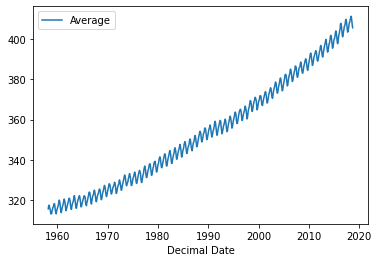

In [11]:
# simple plotting is easy 
co2_df.plot('Decimal Date', 'Average')

In [12]:
# making new columns is easy

In [16]:
co2_df['Trend']

0      314.62
1      315.29
2      314.71
4      314.98
5      315.94
        ...  
722    407.91
723    408.49
724    408.32
725    408.90
726    409.02
Name: Trend, Length: 720, dtype: float64

---
#### not just files

In [18]:
# a bit more general
url = 'https://en.wikipedia.org/wiki/World_population'

In [19]:
pop_tables = pd.read_html(url)
pop_table_df = pop_tables[4]

In [20]:
#!pip install lxml

In [22]:
pop_table_df

,Rank,Country,Population,% of world,Date,Source(official or UN)
0,1,China,1413747800,NaN,18 Jun 2022,National population clock[92]
1,2,India,1379294725,NaN,18 Jun 2022,National population clock[93]
2,3,United States,332789225,NaN,18 Jun 2022,National population clock[94]
3,4,Indonesia,269603400,NaN,1 Jul 2020,National annual projection[95]
4,5,Pakistan,220892331,NaN,1 Jul 2020,UN Projection[96]
5,6,Brazil,214774567,NaN,18 Jun 2022,National population clock[97]
6,7,Nigeria,206139587,NaN,1 Jul 2020,UN Projection[96]
7,8,Bangladesh,172912102,NaN,18 Jun 2022,National population clock[98]
8,9,Russia,146748590,NaN,1 Jan 2020,National annual estimate[99]
9,10,Mexico,127792286,NaN,1 Jul 2020,National annual projection[100]


In [23]:
pop_table_df.columns

Index(['Rank', 'Country', 'Population', '% of world', 'Date',
       'Source(official or UN)'],
      dtype='object')

In [24]:
pop_table_df['Population_Mil'] = pop_table_df['Population']/1E6

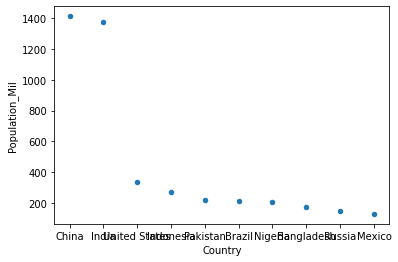

In [25]:
ax = pop_table_df.plot.scatter('Country','Population_Mil')

In [26]:
import matplotlib.pyplot as plt

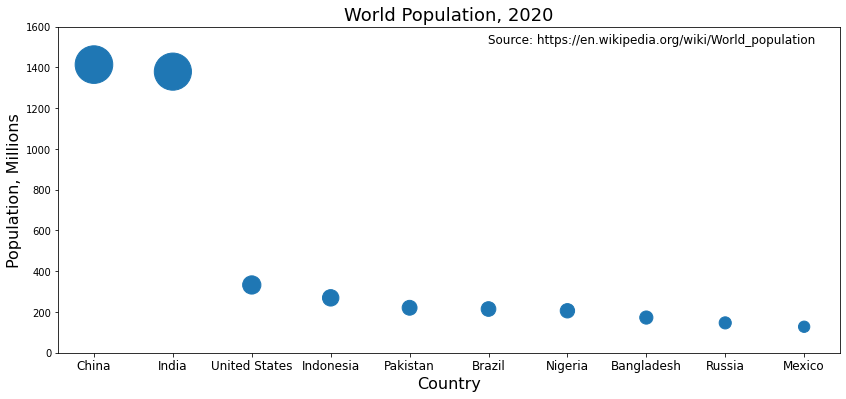

In [28]:
fig, ax = plt.subplots(1,1, figsize = (14,6))
fontsize = 18
pop_table_df.plot.scatter(x='Country',y='Population_Mil', s='Population_Mil', ax=ax)
ax.set_title(f'World Population, 2020', fontsize=fontsize)
ax.annotate(f'Source: {url}', xy=(1, 1), xytext=(0.55, 0.95), textcoords='axes fraction', fontsize=12)
ax.set_xlabel('Country',  fontsize=fontsize-2)
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel('Population, Millions', fontsize=fontsize-2)
ax.set_ylim([0,1600])
plt.show()
